In [12]:
'''
加载一些python依赖库
'''
import allantools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

In [2]:
'''
定义MTIE和TDEV模板，满足ITU-T 8262.1标准
'''
def mask_8261_1(tau, type='noise_gen', option = 'MTIE'):
    tau = tau
    mask_curve = np.zeros(len(tau))
    if (type == 'noise_gen') and (option == 'MTIE'):
        for k in range(len(tau)):
            if (tau[k] <= 1) and (tau[k] >=0.1):
                mask_curve[k] = 10.0 * tau[k] ** 0.155
            elif (tau[k] >1) and (tau[k] <= 100.0):
                mask_curve[k] = 10.0 * tau[k] ** 0.1
            elif (tau[k] >100.0) and (tau[k] <= 1000.0):
                mask_curve[k] = 6.3 * tau[k] ** 0.2
            else:
                pass
    elif (type == 'noise_gen') and (option == 'TDEV'):
        for k in range(len(tau)):
            if (tau[k] <= 25.0) and (tau[k] >= 0.1 ):
                mask_curve[k] = 0.64
            elif (tau[k] > 25.0) and (tau[k] <= 100.0):
                mask_curve[k] = 0.128 * tau[k] ** 0.5
            elif (tau[k] >100.0) and (tau[k] <= 1000.0):
                mask_curve[k] = 1.28
            else:
                pass    
    elif (type == 'input_wander_tol_level_2') and (option == 'MTIE'):
        for k in range(len(tau)):
            if (tau[k] <= 2.5) and (tau[k] >= 0.1 ):
                mask_curve[k] = 0.25
            elif (tau[k] > 2.5) and (tau[k] <= 20.0):
                mask_curve[k] = 0.1 * tau[k]
            elif (tau[k] >20.0) and (tau[k] <= 400.0):
                mask_curve[k] = 2.0
            elif (tau[k] >400.0) and (tau[k] <= 1000.0):
                mask_curve[k] = 0.005 * tau[k]                
            else:
                pass     
    elif (type == 'input_wander_tol_level_2') and (option == 'TDEV'):
        for k in range(len(tau)):
            if (tau[k] <= 7.0) and (tau[k] >= 0.1 ):
                mask_curve[k] = 12.0
            elif (tau[k] > 7.0) and (tau[k] <= 100.0):
                mask_curve[k] = 1.7 * tau[k]
            elif (tau[k] >100.0) and (tau[k] <= 1000.0):
                mask_curve[k] = 170.0                
            else:
                pass     
    
    else:
        pass
    return mask_curve

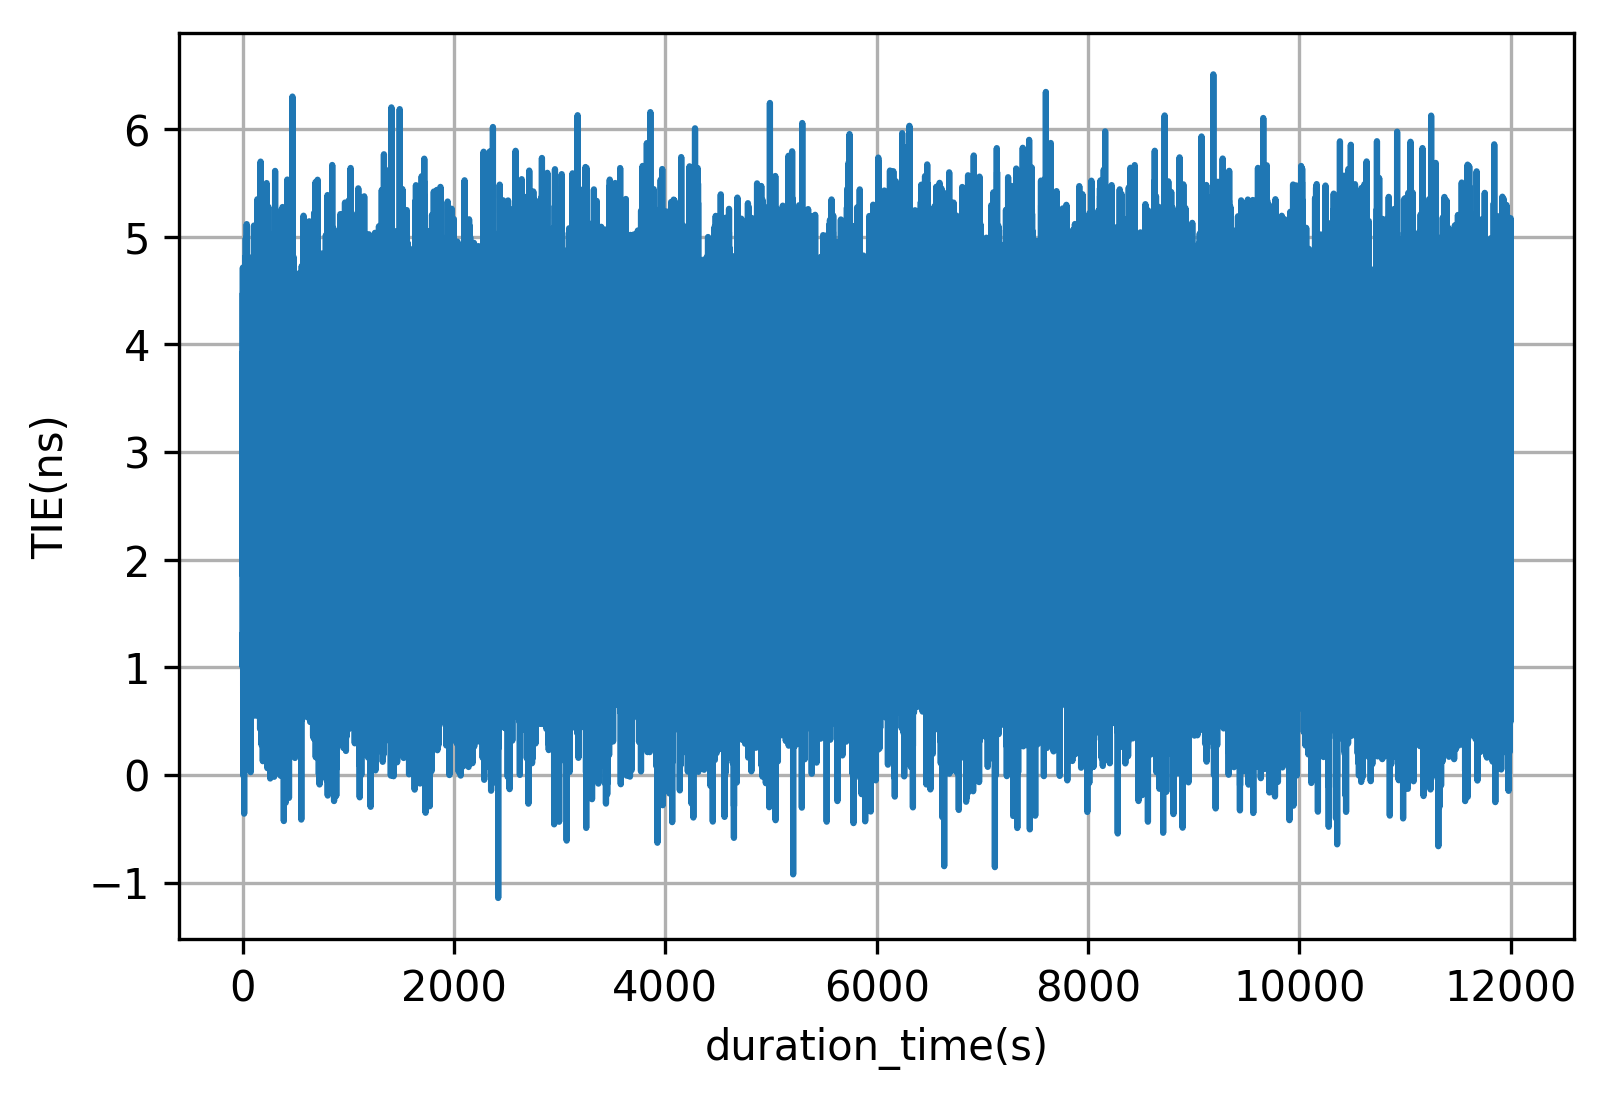

In [38]:
'''
模拟一段tie噪声做演示
'''
from allantools import noise
sample_rate = 30 #sample_rate = 30Hz
duration_time = 12000
N = duration_time * sample_rate
tie = 0.2 * noise.white(N) + noise.pink(N)
tie = tie * 0.3
t = np.linspace(0,duration_time,N)
plt.plot(t, tie)
plt.xlabel('duration_time(s)')
plt.ylabel('TIE(ns)')
plt.grid()

In [3]:
'''
读取txt测试文件，第一列为sample_time 第2列为tie数据
'''
def read_tie(url):
    PD = pd.read_csv(url, header=None)
    PD = PD[2]
    tmp = PD.values
    M = len(tmp)
    tie = np.zeros(M)
    for k in range(M):
        tie[k] = tmp[k]* 1e9 *1e-9 #ns
    return tie

In [13]:
url = '/home/lvbo/allantools/TIE/6700.txt'
tie = read_tie(url)

In [14]:
tie[0:12000*2*50].shape

(1200000,)

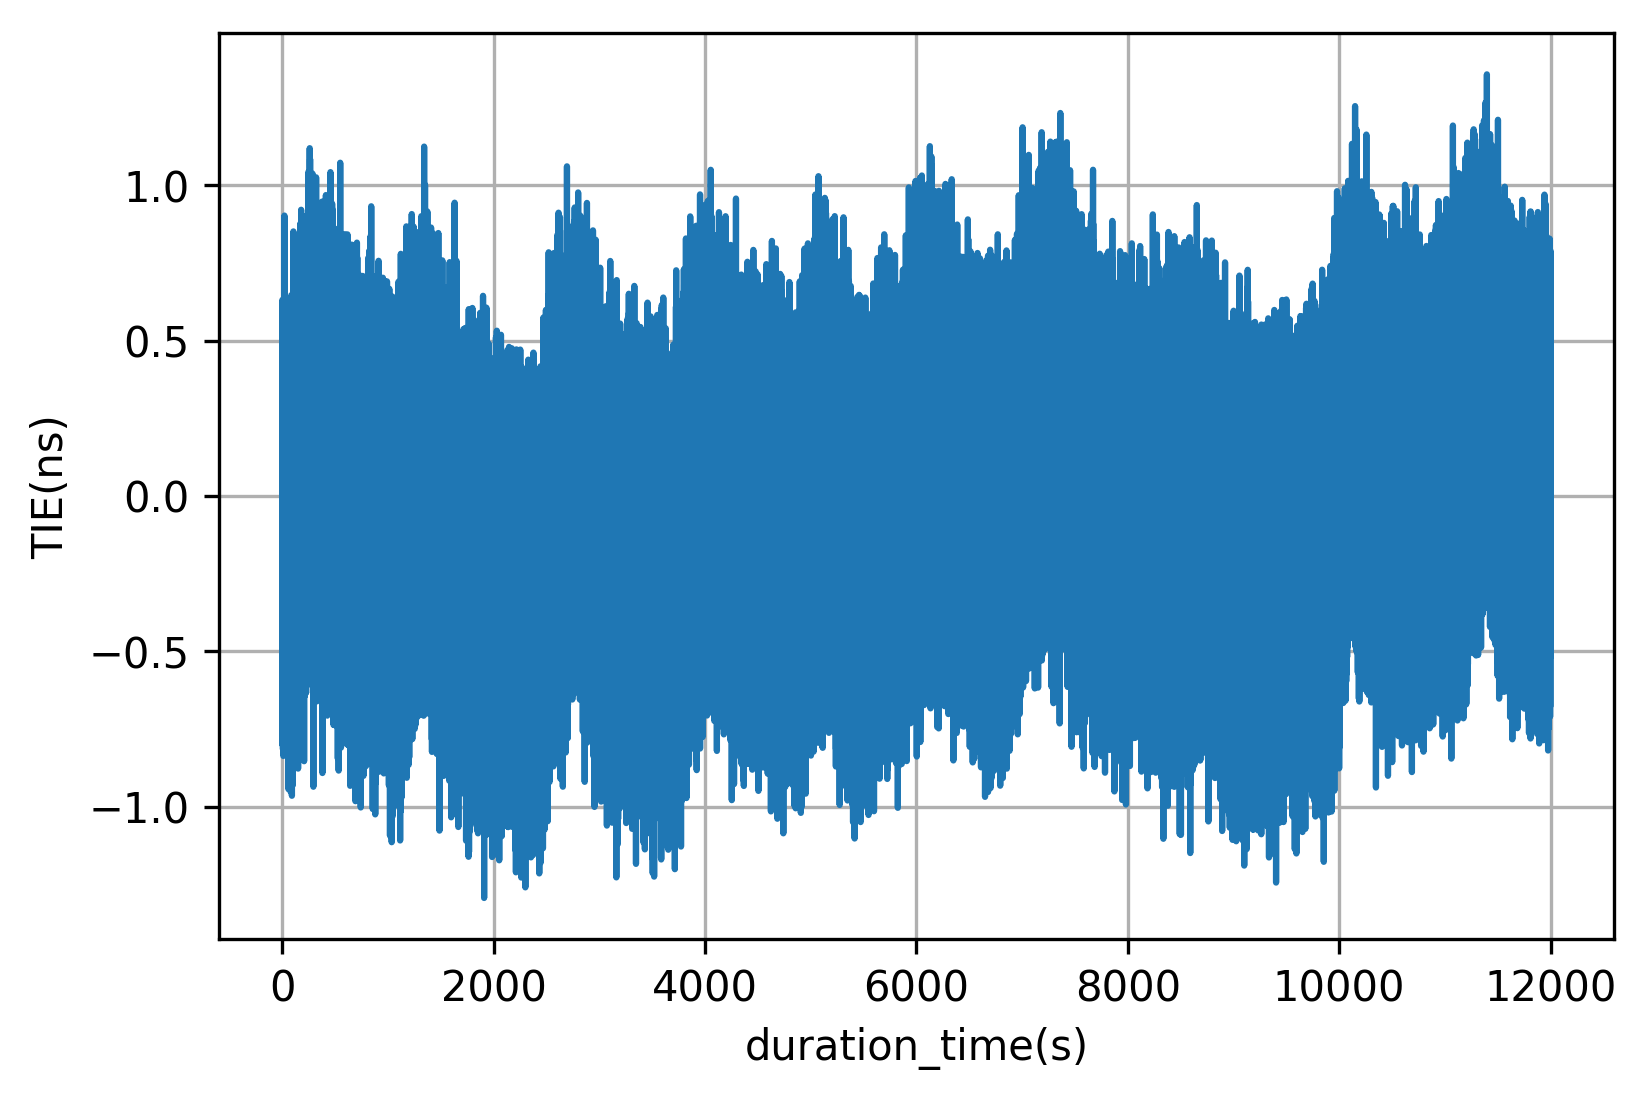

In [15]:
N = len(tie)
sample_rate = 50 #sample_rate = xx Hz
duration_time = 12000
# N = duration_time * sample_rate
t = np.linspace(0,duration_time,N)
plt.plot(t, tie)
plt.xlabel('duration_time(s)')
plt.ylabel('TIE(ns)')
plt.grid()

Text(0.5, 1.0, 'MTIE')

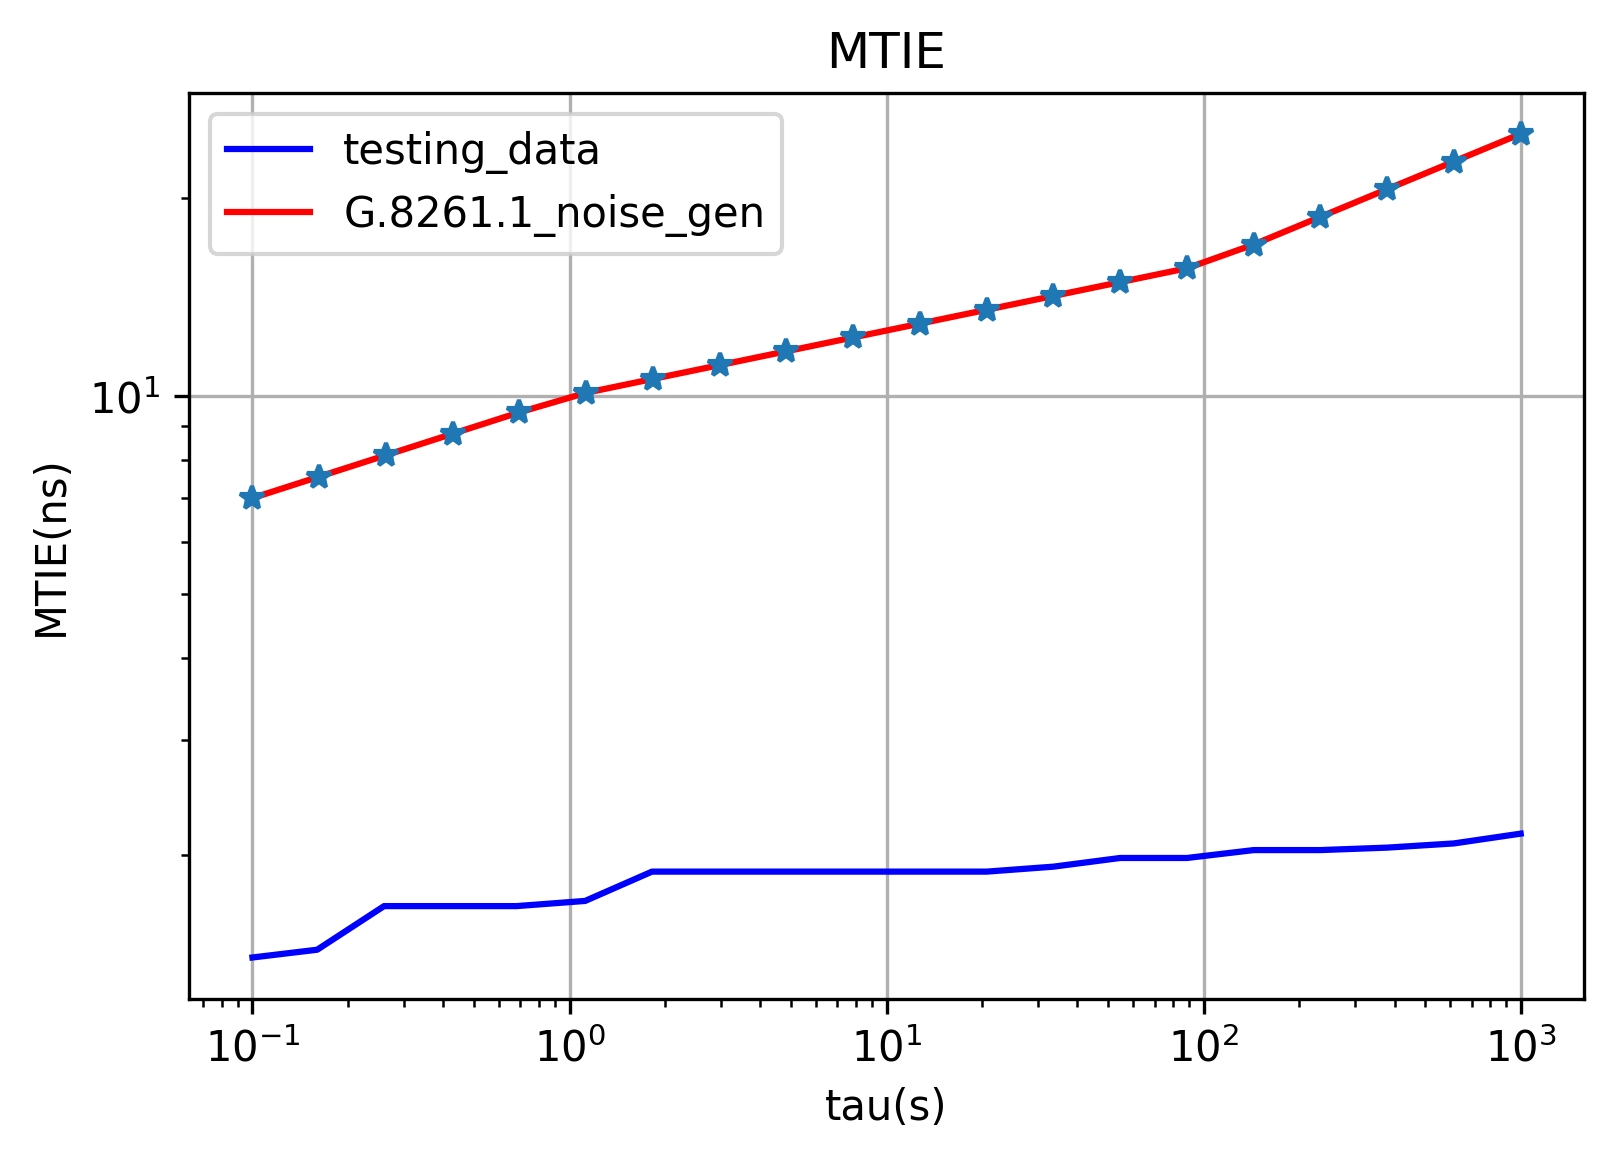

In [16]:
taus = np.logspace(-1, 3, 20)  # tau values from 1 to 1000
# taus = np.logspace(0.1,1000,100)
plt.subplot(111, xscale="log", yscale="log")

# sample_rate = 30 #sample_rate = 30Hz
(t2, ad, ade, adn) = allantools.mtie(tie, rate = sample_rate, data_type = "phase", taus = taus)
style1 = 'b'
plt.loglog(t2, ad, style1)
####################################################################
tau_mask = np.logspace(-1,3,20)
mask_curve = mask_8261_1(tau_mask)
style2 = 'r'
plt.loglog(tau_mask, mask_curve, style2)
style3 = '*'
plt.loglog(tau_mask, mask_curve, style3)
####################################################################
plt.legend(['testing_data','G.8261.1_noise_gen'])
plt.grid()
plt.xlabel('tau(s)')
plt.ylabel('MTIE(ns)')
plt.title('MTIE')

Text(0.5, 1.0, 'TDEV')

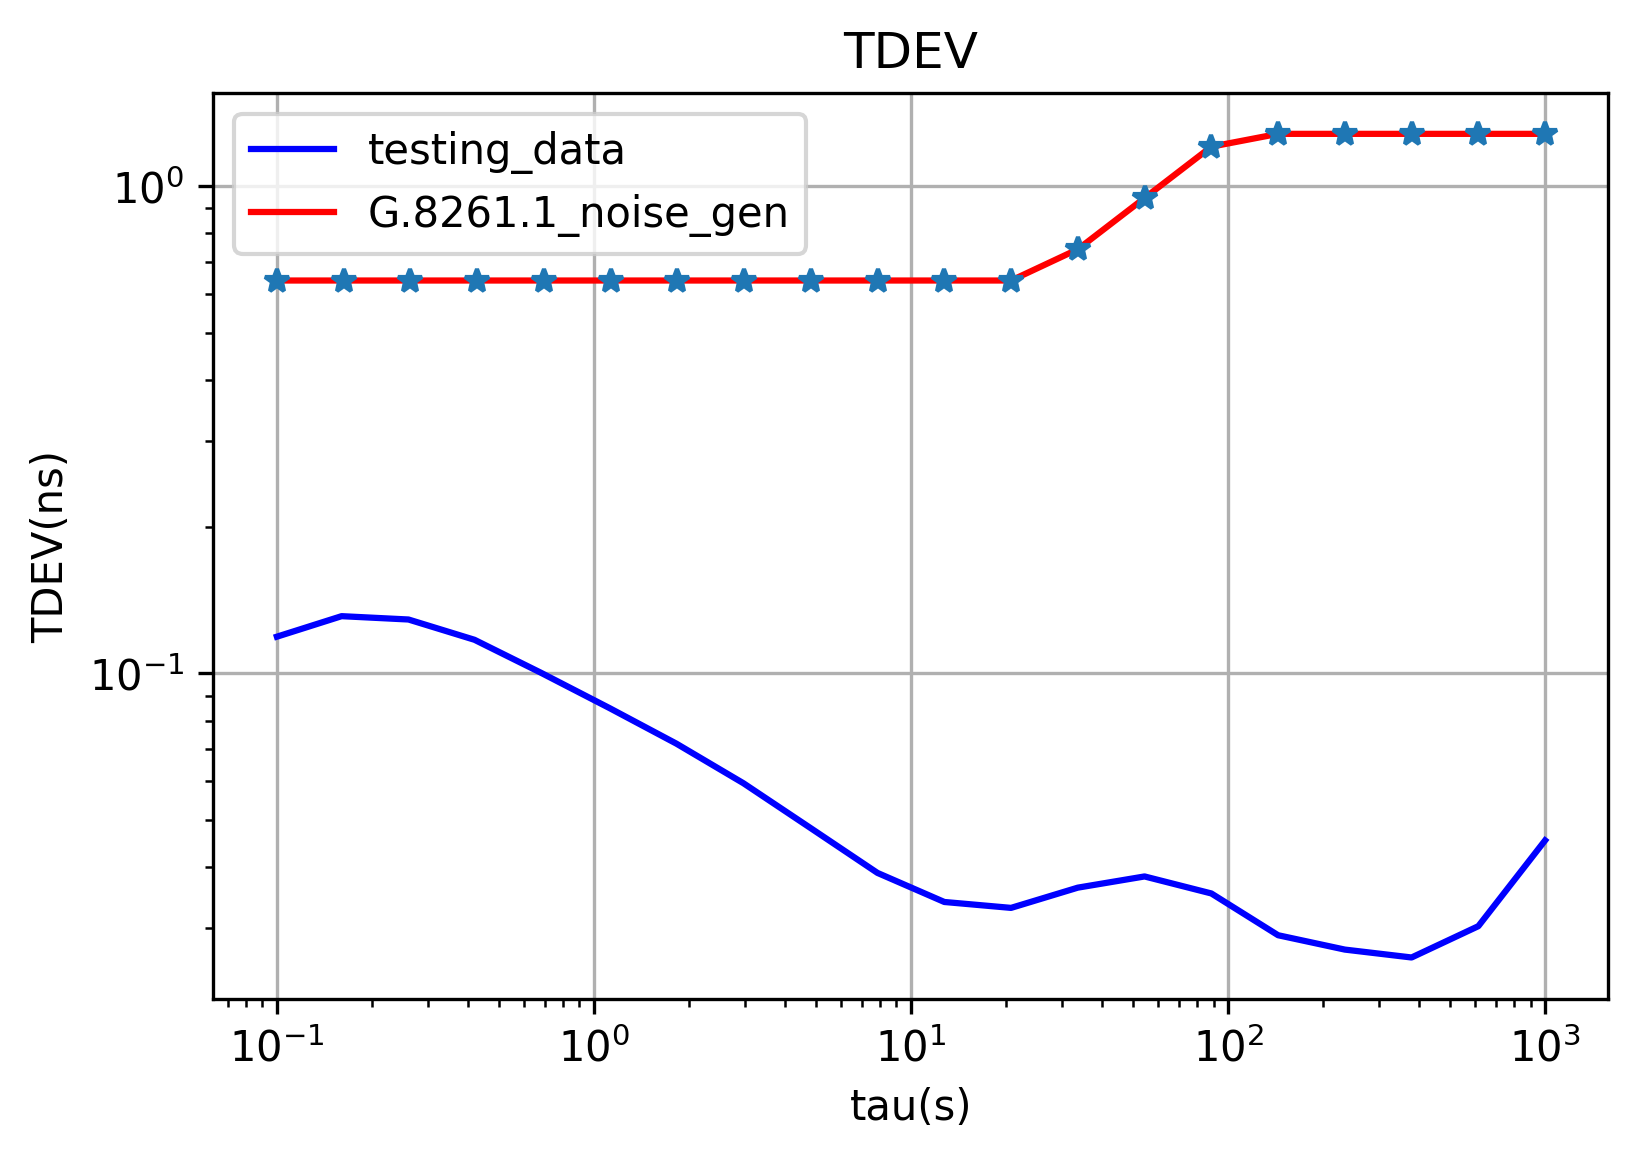

In [17]:
taus = np.logspace(-1, 3, 20)  # tau values from 1 to 1000
plt.subplot(111, xscale="log", yscale="log")

# sample_rate = 30 #sample_rate = 30Hz
(t2, ad, ade, adn) = allantools.tdev(tie, rate = sample_rate, data_type = "phase", taus = taus)
style1 = 'b'
plt.loglog(t2, ad, style1)
####################################################################
tau_mask = np.logspace(-1, 3, 20)
mask_curve = mask_8261_1(tau_mask,type='noise_gen', option = 'TDEV')
style2 = 'r'
plt.loglog(tau_mask, mask_curve, style2)
style3 = '*'
plt.loglog(tau_mask, mask_curve, style3)
####################################################################
plt.legend(['testing_data','G.8261.1_noise_gen'])
plt.grid()
plt.xlabel('tau(s)')
plt.ylabel('TDEV(ns)')
plt.title('TDEV')